In [1]:
#第五題
from __future__ import print_function
import keras
from keras.datasets import mnist

# input image dimensions 28x28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

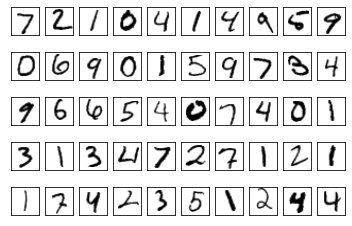

In [2]:
import numpy as np
import matplotlib.pyplot as plt
amount= 50
lines = 5
columns = 10
number = np.zeros(amount)

for i in range(amount):
    number[i] = y_test[i]
    # print(number[0])

fig = plt.figure()

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(x_test[i,:,:], cmap='binary')
    plt.sca(ax)
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.show()

In [3]:
import keras
import numpy as np
from keras.datasets import mnist
from __future__ import print_function
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from __future__ import print_function

digit_0 = x_train[y_train == 0]
digit_1 = x_train[y_train == 1]
digit_2 = x_train[y_train == 2]
digit_3 = x_train[y_train == 3]
digit_4 = x_train[y_train == 4]
digit_5 = x_train[y_train == 5]
digit_6 = x_train[y_train == 6]
digit_7 = x_train[y_train == 7]
digit_8 = x_train[y_train == 8]
digit_9 = x_train[y_train == 9]

zero_selected = resample(digit_0, n_samples=100)
one_selected = resample(digit_1, n_samples=100)
two_selected = resample(digit_2, n_samples=100)
three_selected = resample(digit_3, n_samples=100)
four_selected = resample(digit_4, n_samples=100)
five_selected = resample(digit_5, n_samples=100)
six_selected = resample(digit_6, n_samples=100)
seven_selected = resample(digit_7, n_samples=100)
eight_selected = resample(digit_8, n_samples=100)
nine_selected = resample(digit_9, n_samples=100)

data_set = np.concatenate([zero_selected, one_selected, two_selected, three_selected, four_selected, five_selected, six_selected, seven_selected, eight_selected, nine_selected])
np.random.shuffle(data_set)
print("data_set", data_set.shape) #(1000, 28, 28)

data_set_reshape = data_set.reshape((data_set.shape[0],-1))
print("data_set_reshape", data_set_reshape.shape) #(1000,784)

data_set_reshape_transpose = np.transpose(data_set_reshape)
print("data_set_reshape_transpose", data_set_reshape_transpose.shape) #(784,1000)

sc = StandardScaler()
normalized_data_set_reshape = sc.fit_transform(data_set_reshape)
print("normalized_data_set_shape",normalized_data_set_reshape.shape) #(1000,784)
normalized_data_set_transpose_reshape = sc.fit_transform(data_set_reshape_transpose)
print("normalized_data_set_transpose_shape",data_set_reshape_transpose.shape) #(784,1000)
first_img = normalized_data_set_reshape[0]
print("first_img_shape", first_img.shape) #(784,)

cov_matric = np.cov(normalized_data_set_transpose_reshape)
print("cov_matric.shape", cov_matric.shape)
eig_vals, eig_vecs = np.linalg.eig(cov_matric) #(784, 784)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True) #5.2題

eig_pairs_array = np.array(eig_pairs, dtype=object)
print("eigenpairs_shape", eig_pairs_array.shape) #(784, 2)

first_eigenvectors_array_transpose = None
decoded_result = None

def PCA(n_components):
    first_eigenvectors = []
    for i in range(n_components):
        first_eigenvectors.append(eig_pairs_array[i][1])
    first_eigenvectors_array = np.array(first_eigenvectors)
    first_eigenvectors_array_transpose = np.transpose(first_eigenvectors_array)
    print("first_eigenvectors_array_shape",first_eigenvectors_array.shape)
    print("first_eigenvectors_array_transpose_shape",first_eigenvectors_array_transpose.shape)
    print("first_img_shape",first_img.shape)
    
    encoded_result = np.matmul(first_eigenvectors_array, first_img)
    print("encoded_result_shape", encoded_result.shape)
    
    decoded_result = np.matmul(first_eigenvectors_array_transpose, encoded_result)
    print("decoded_result_shape", decoded_result.shape)
    
    decoded_result_reshape = decoded_result.reshape(28,28)
    print("decoded_result_reshape", decoded_result_reshape.shape)
    
#     plt.imshow(decoded_result_reshape, cmap='binary')

PCA(500)
PCA(300)
PCA(100)
PCA(50)

# Plots cannot be shown, but in theory, images reduced to lower dimensions will have worse qualities after decoding

data_set (1000, 28, 28)
data_set_reshape (1000, 784)
data_set_reshape_transpose (784, 1000)
normalized_data_set_shape (1000, 784)
normalized_data_set_transpose_shape (784, 1000)
first_img_shape (784,)
cov_matric.shape (784, 784)
eigenpairs_shape (784, 2)
first_eigenvectors_array_shape (500, 784)
first_eigenvectors_array_transpose_shape (784, 500)
first_img_shape (784,)
encoded_result_shape (500,)
decoded_result_shape (784,)
decoded_result_reshape (28, 28)
first_eigenvectors_array_shape (300, 784)
first_eigenvectors_array_transpose_shape (784, 300)
first_img_shape (784,)
encoded_result_shape (300,)
decoded_result_shape (784,)
decoded_result_reshape (28, 28)
first_eigenvectors_array_shape (100, 784)
first_eigenvectors_array_transpose_shape (784, 100)
first_img_shape (784,)
encoded_result_shape (100,)
decoded_result_shape (784,)
decoded_result_reshape (28, 28)
first_eigenvectors_array_shape (50, 784)
first_eigenvectors_array_transpose_shape (784, 50)
first_img_shape (784,)
encoded_result_